<a href="https://colab.research.google.com/github/jmmarinr/ComputationalMethods/blob/master/Interpolacion/Interpolacion_SciPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, CubicSpline, CubicHermiteSpline, lagrange
import pandas as pd



# Interpolación Numérica con SciPy

---

### Profesor: Juan Marcos Marín

---


## Datos de prueba

Generemos 5 datos para una función $\sin(x)$

In [13]:
# Datos conocidos
x = np.linspace(0, 2*np.pi, 5)
f = lambda x: np.sin(x)
y = f(x)

dy = np.cos(x)  # Derivadas para Hermite

datos = pd.DataFrame({'x': x, 'y': y, 'dy/dx': dy})
print("Datos conocidos:")
print(datos)


# Datos para interpolación
x_interp = np.linspace(min(x), max(x), 100)


Datos conocidos:
          x             y         dy/dx
0  0.000000  0.000000e+00  1.000000e+00
1  1.570796  1.000000e+00  6.123234e-17
2  3.141593  1.224647e-16 -1.000000e+00
3  4.712389 -1.000000e+00 -1.836970e-16
4  6.283185 -2.449294e-16  1.000000e+00


## Interpolación con `interp1d`

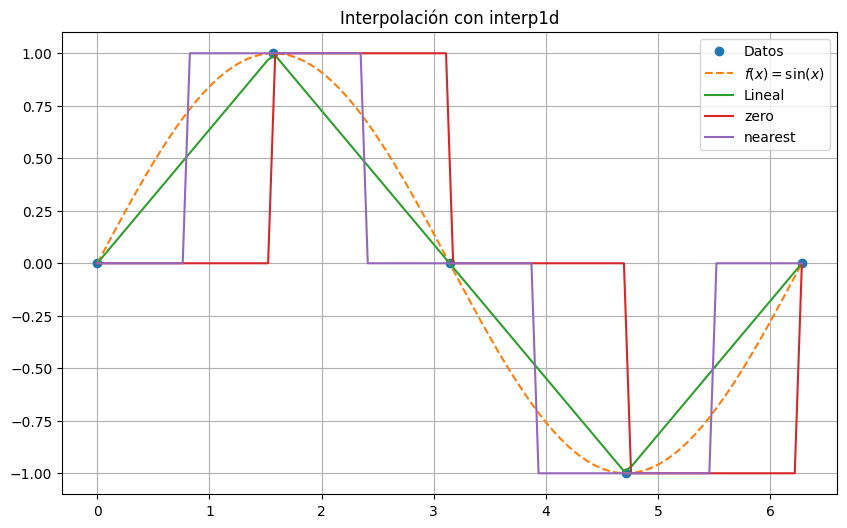

In [14]:
# Tipos de interpolación con interp1d

f_linear = interp1d(x, y, kind='linear') # Lineal
f_zero = interp1d(x, y, kind='zero')
f_nearest = interp1d(x, y, kind='nearest')

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Datos')
plt.plot(x_interp, f(x_interp), label='$f(x) = \\sin(x)$', linestyle='--')
plt.plot(x_interp, f_linear(x_interp), label='Lineal')
plt.plot(x_interp, f_zero(x_interp), label='zero')
plt.plot(x_interp, f_nearest(x_interp), label='nearest')
plt.title("Interpolación con interp1d")
plt.legend()
plt.grid(True)
plt.show()


## Interpolación con `Lagrange`

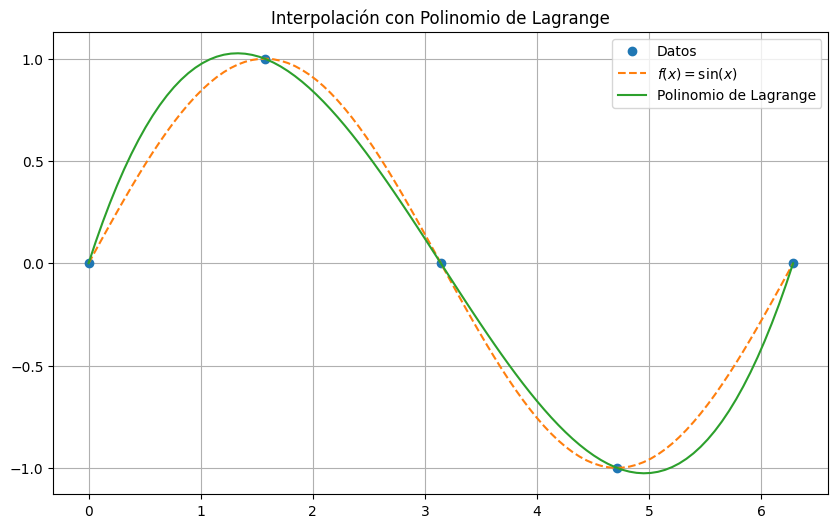

In [15]:
Pol_Lagrange = lagrange(x, y) # Devuelve una función con el polinomio de Lagrange
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Datos')
plt.plot(x_interp, f(x_interp), label='$f(x) = \\sin(x)$', linestyle='--')
plt.plot(x_interp, Pol_Lagrange(x_interp), label='Polinomio de Lagrange')
plt.title("Interpolación con Polinomio de Lagrange")
plt.legend()
plt.grid(True)
plt.show()

## Interpolación con `CubicSpline`

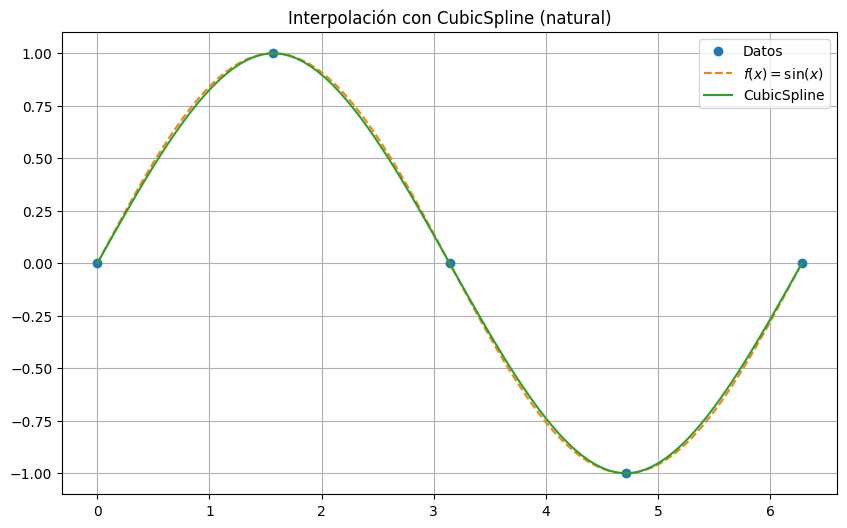

In [16]:

Pol_CS = CubicSpline(x, y, bc_type='natural') # Devuelve una función de interpolación cúbica natural

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Datos')
plt.plot(x_interp, f(x_interp), label='$f(x) = \\sin(x)$', linestyle='--')
plt.plot(x_interp, Pol_CS(x_interp), label='CubicSpline')
plt.title("Interpolación con CubicSpline (natural)")
plt.legend()
plt.grid(True)
plt.show()


## Interpolación con `CubicHermiteSpline`

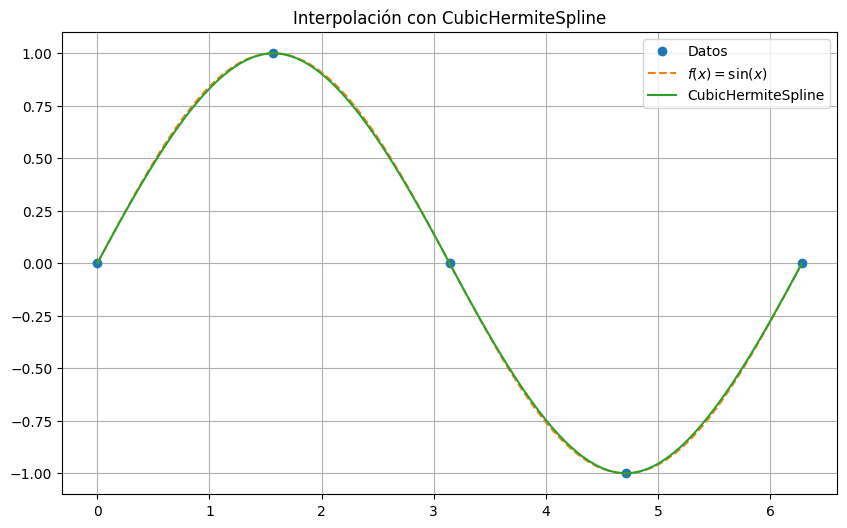

In [17]:

Pol_Hermite = CubicHermiteSpline(x, y, dy) # Devuelve una función con el polinomio de Hermite

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Datos')
plt.plot(x_interp, f(x_interp), label='$f(x) = \\sin(x)$', linestyle='--')
plt.plot(x_interp, Pol_Hermite(x_interp), label='CubicHermiteSpline')
plt.title("Interpolación con CubicHermiteSpline")
plt.legend()
plt.grid(True)
plt.show()


# Comparación de los métodos y su error

Sea el error definido como

$$|P_n(x) - f(x)|$$


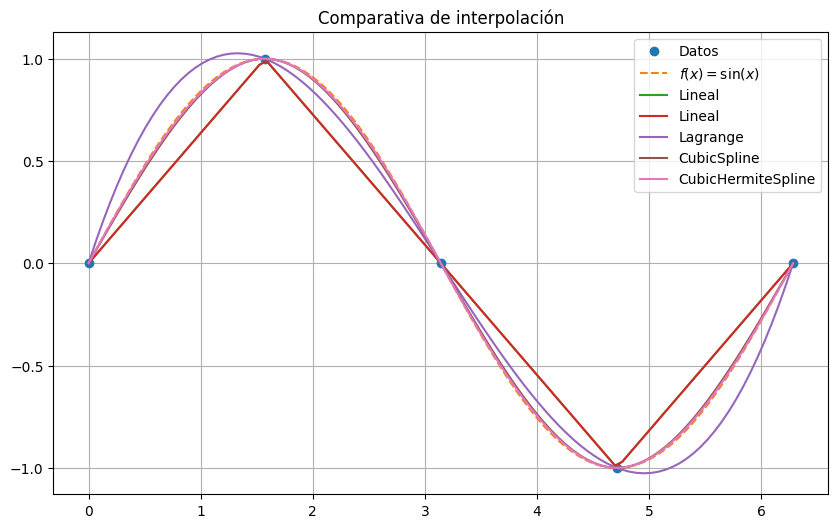

In [18]:
# Grafica comparativa de interpolación

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Datos')
plt.plot(x_interp, f(x_interp), label='$f(x) = \\sin(x)$', linestyle='--')
plt.plot(x_interp, f_linear(x_interp), label='Lineal')
plt.plot(x_interp, f_linear(x_interp), label='Lineal')
plt.plot(x_interp, Pol_Lagrange(x_interp), label='Lagrange')
plt.plot(x_interp, Pol_CS(x_interp), label='CubicSpline')
plt.plot(x_interp, Pol_Hermite(x_interp), label='CubicHermiteSpline')
plt.legend()
plt.title("Comparativa de interpolación")
plt.grid(True)
plt.show()

In [19]:
def Errores(x, f, f_interp):
    """
    Calcula el error absoluto entre la función original y la interpolada.
    Entradas:
    - x: puntos donde se evalúa la función
    - f: función original
    - f_interp: función interpolada
    Salida:
    - Errores absolutos en los puntos x
    """
    return np.abs(f(x) - f_interp(x))

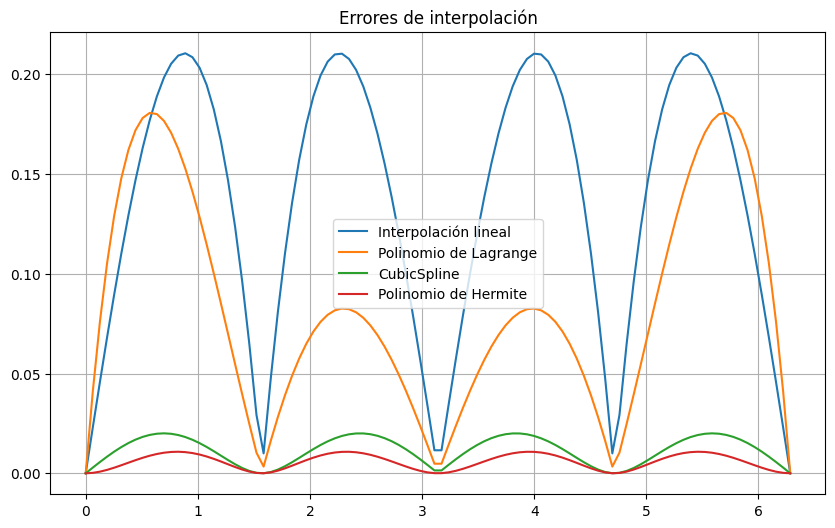

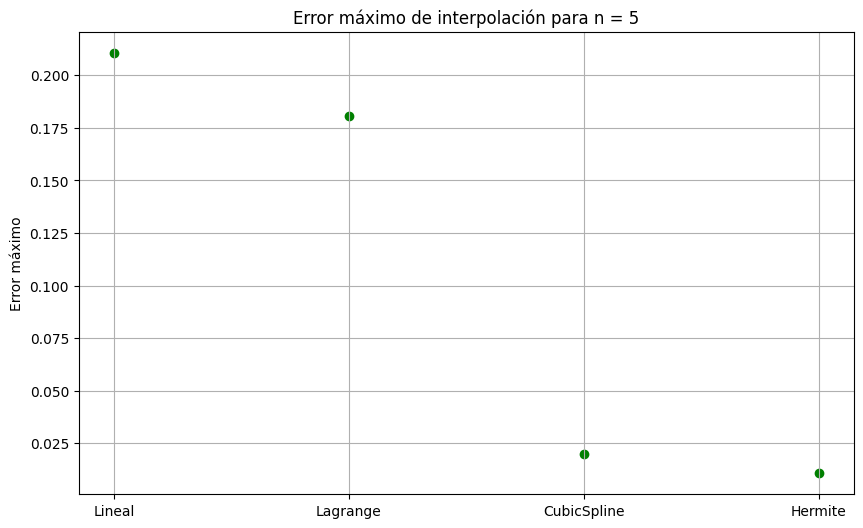

In [20]:
# Definir errores para cada método de interpolación
Errores_linear = Errores(x_interp, f, f_linear)
Erorres_Lagrange = Errores(x_interp, f, Pol_Lagrange)
Errores_CS = Errores(x_interp, f, Pol_CS)
Erorres_Hermite = Errores(x_interp, f, Pol_Hermite)

# Graficar errores
plt.figure(figsize=(10, 6))
plt.plot(x_interp, Errores_linear, label='Interpolación lineal')
plt.plot(x_interp, Erorres_Lagrange, label='Polinomio de Lagrange')
plt.plot(x_interp, Errores_CS, label='CubicSpline')
plt.plot(x_interp, Erorres_Hermite, label='Polinomio de Hermite')
plt.title("Errores de interpolación")
plt.legend()
plt.grid(True)
plt.show()


# Error máximo
plt.figure(figsize=(10, 6))
plt.scatter(['Lineal', 'Lagrange', 'CubicSpline', 'Hermite'],
            [np.max(Errores_linear), np.max(Erorres_Lagrange),
             np.max(Errores_CS), np.max(Erorres_Hermite)],
            color='green')
plt.title("Error máximo de interpolación para n = 5")
plt.ylabel("Error máximo")
plt.grid(True)
plt.show()


## Actividad Propuesta

Usa los métodos anteriores para interpolar la función $f(x) = \frac{1}{1 + x^2}$ en el intervalo $[-5, 5]$ usando 11 puntos equidistantes. Compara los resultados con la función original y comenta cuál método se aproxima mejor y por qué.
